In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [162]:
df = pd.read_csv("train.csv")

df.replace(" ", np.nan, inplace = True)
df.astype({"Age": np.float64, "Fare": np.float64})

df.replace({"male" : 1 , "female" : 0} ,inplace = True)

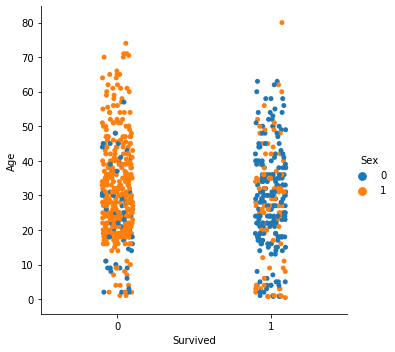

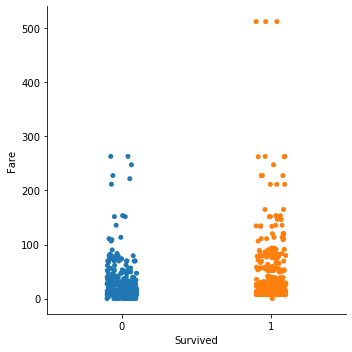

In [163]:

sns.catplot(x = "Survived", y = "Age" , hue = "Sex", data = df)
sns.catplot(y = "Fare", x = "Survived", data= df )

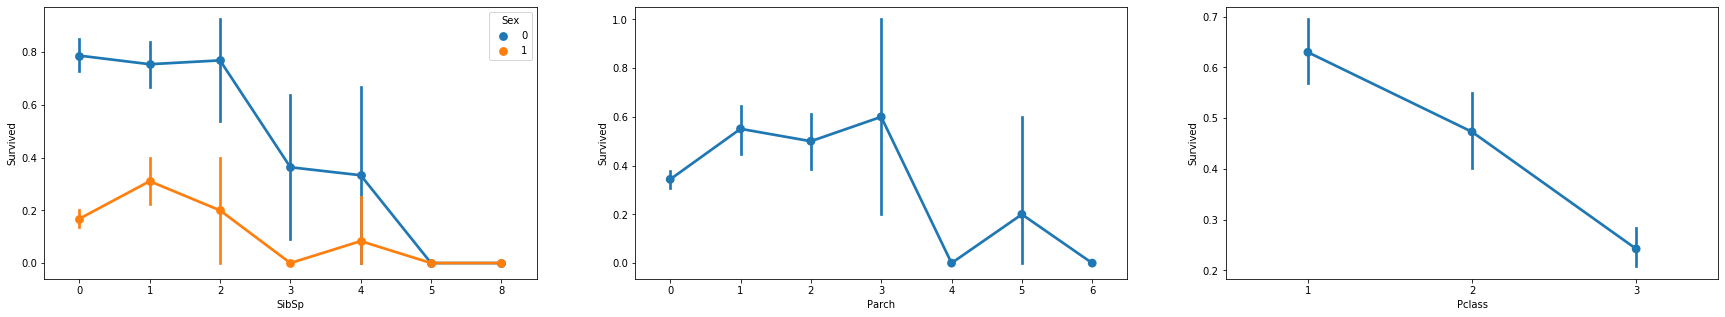

In [164]:
fig, axis = plt.subplots(ncols = 3, figsize = (30,5))
sns.pointplot(y = "Survived", x = "SibSp", hue = "Sex" , data = df, ax = axis[0])
sns.pointplot(x = "Parch", y = "Survived", data = df, ax = axis[1])
sns.pointplot(x = "Pclass", y = "Survived", data = df, ax = axis[2])


In [165]:
df.corr().abs()[["Survived"]]

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Sex,0.543351
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


In [166]:
df["Relatives"] = df.apply(lambda row : int((row["SibSp"] + row["Parch"]) > 0) ,axis = 1)
df.corr().abs()["Survived"]

PassengerId    0.005007
Survived       1.000000
Pclass         0.338481
Sex            0.543351
Age            0.077221
SibSp          0.035322
Parch          0.081629
Fare           0.257307
Relatives      0.203367
Name: Survived, dtype: float64

In [167]:
df = df[["Sex", "Pclass", "Age", "Fare", "Relatives", "Survived"]].dropna()

In [286]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[["Sex", "Pclass", "Age", "Fare", "Relatives"]], df.Survived, test_size = 0.2, random_state = 0)

In [287]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [288]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(5, activation="relu", input_dim = 5))
model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [292]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(x = X_train, y = y_train, batch_size = 16, epochs = 100)

Epoch 1/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8161
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8109
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8196
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8249
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8179
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.8214
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8249
Epoch 8/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.8214
Epoch 9/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.8161
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8249
Epoch 11/

In [293]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8111888111888111


In [294]:
test_data = pd.read_csv("test.csv")
test_data.replace(" ", np.nan, inplace = True)
test_data.astype({"Age": np.float64, "Fare": np.float64})

test_data.replace({"male" : 1 , "female" : 0} ,inplace = True)
test_data["Relatives"] = test_data.apply(lambda row : int((row["SibSp"] + row["Parch"]) > 0) ,axis = 1)
test_dat = test_data[["Sex", "Pclass", "Age", "Fare", "Relatives"]]
Y_test = sc.transform(test_dat)
test_pred = model.predict_classes(Y_test)
sol = pd.DataFrame()
sol["PassengerId"] = test_data["PassengerId"]
sol["Survived"] = test_pred
sol.to_csv("Titanic_solution.csv", index = False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').